# **The Boston Housing Dataset**


*The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:*

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [3]:
#Import Libraries
# data manipulation and data reading
import numpy as np
import pandas as pd
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score

### **2. Reading and Exploring the data**

1. Import the dataset.
2. Check the shape, info, datatype of the columns.
3. Check for missing value and handle them.
4. Check for duplicates and handle them.
5. Do the encoding of the categorical columns.
6. Check for outliers and deal with them.
7. Any necessary visualizations.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv')

In [31]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#EDA - Exploratory Data Analysis
#1.null values
#2.duplicate values
#3.outliers
#4.label encoding

In [9]:
data.isnull().sum() # checking for missing values

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [10]:
data.duplicated().sum() #Checking for duplicate values

np.int64(0)

In [11]:
data.drop_duplicates(inplace = True) #drop the duplicate rows (if any)

In [12]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Check and remove Outliers**

## Before Removing Outlies

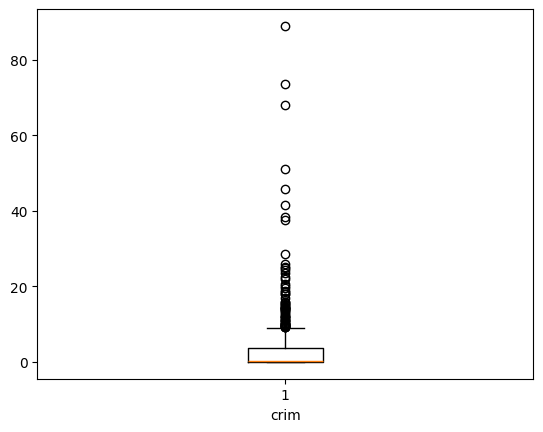

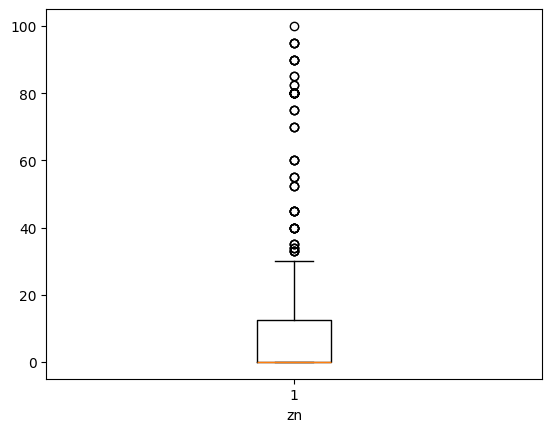

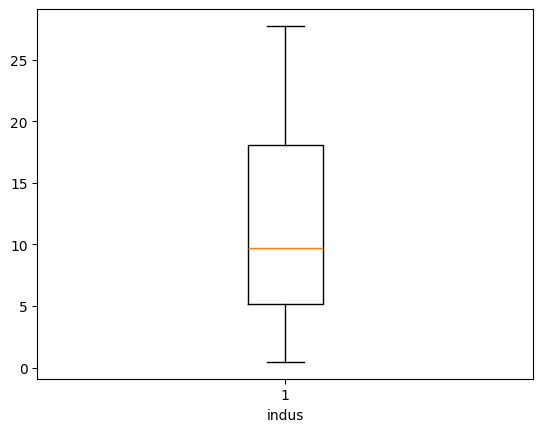

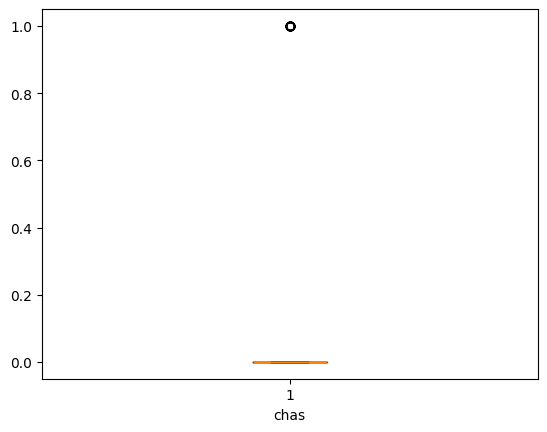

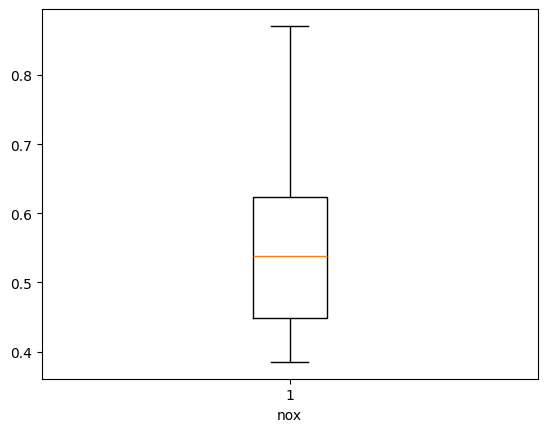

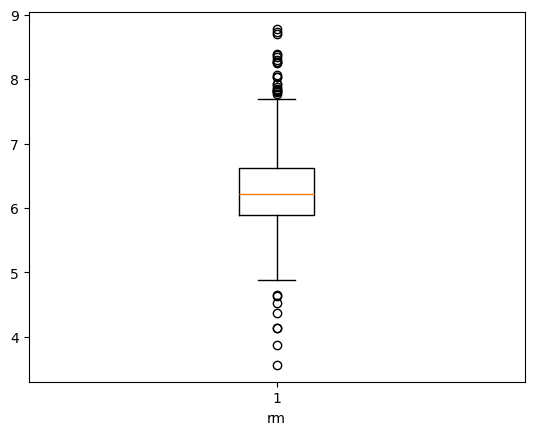

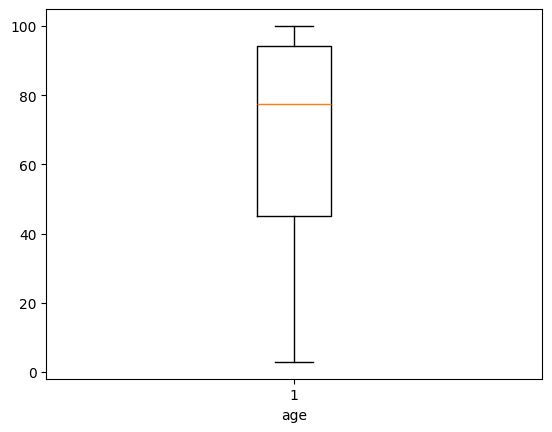

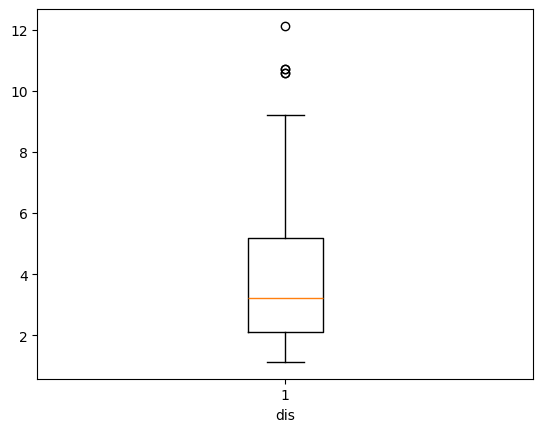

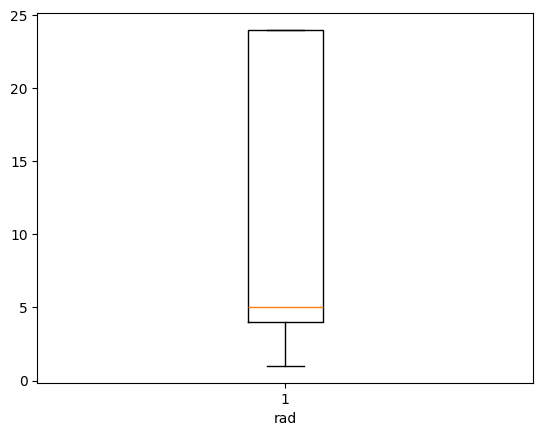

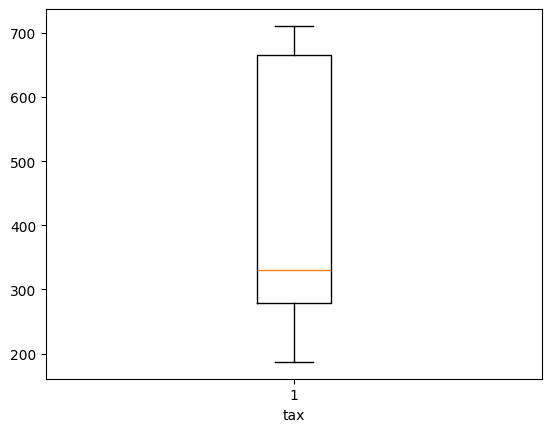

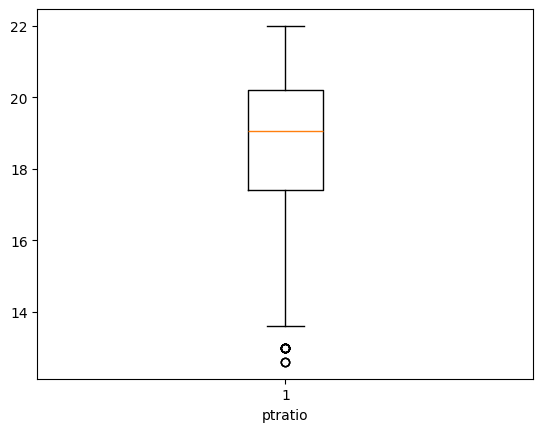

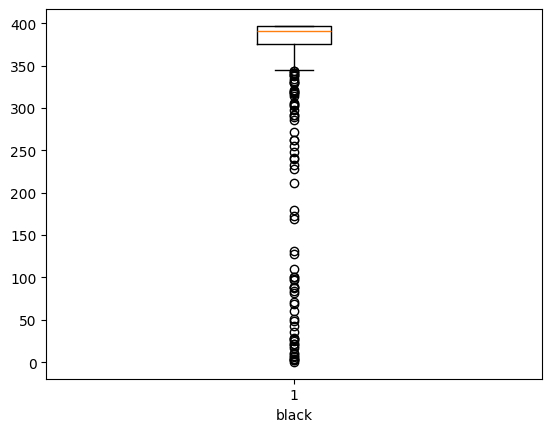

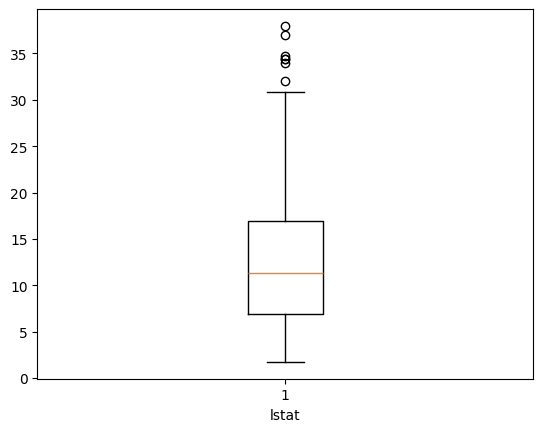

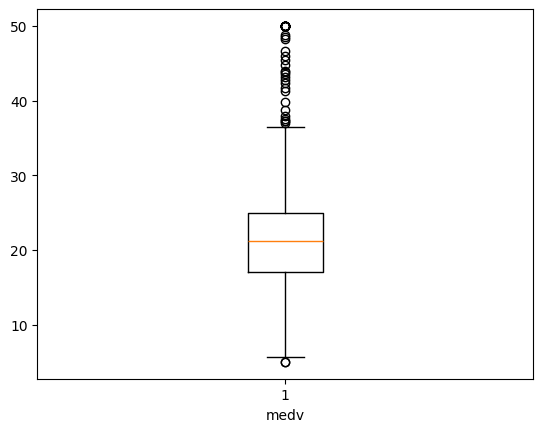

In [13]:
for cols in data.columns:
  if data[cols].dtype!= 'object':
    plt.boxplot(data[cols])
    plt.xlabel(cols)
    plt.show()

In [14]:
out_list= ['crim','zn','rm','dis','ptratio','black','lstat','medv']

In [15]:
def outlier_removal(data,out_list):
  clean_data = data.copy()
  for col in out_list:
    if clean_data[col].dtype != 'object' :
      q1 = clean_data[col].quantile(0.25)
      q3 = clean_data[col].quantile(0.75)
      IQR = q3 - q1
      upper_bound = q3 + IQR * 3
      lower_bound = q1 - IQR * 3
      clean_data = clean_data[(clean_data[col]>=lower_bound)&(clean_data[col]<=upper_bound)]
  return clean_data


In [16]:
data_cleaned = outlier_removal(data, out_list)

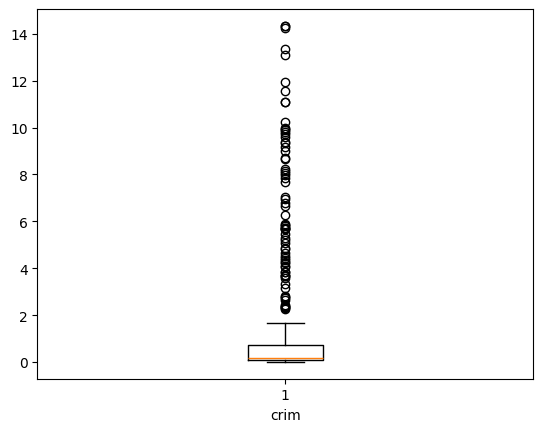

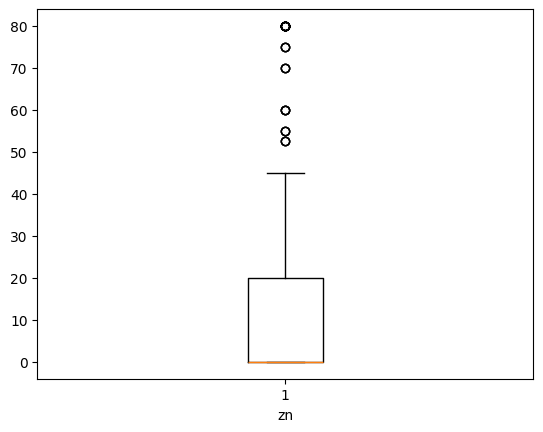

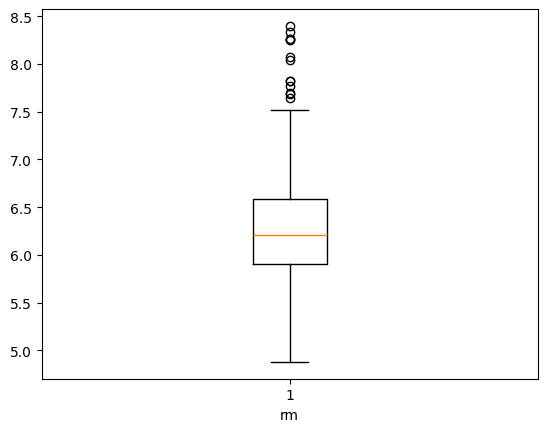

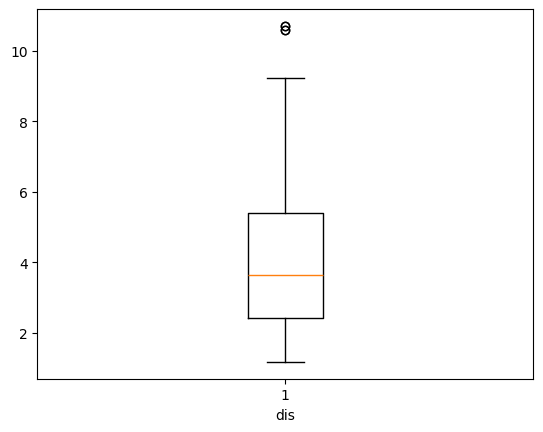

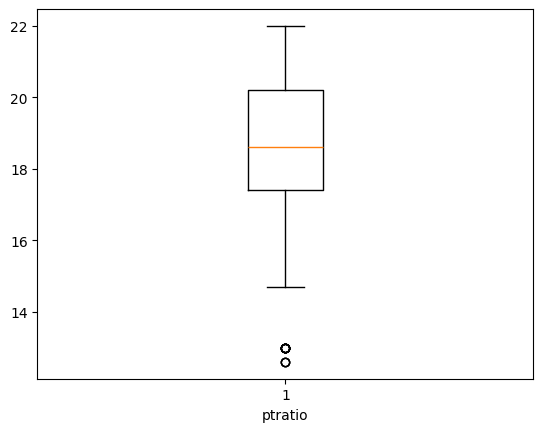

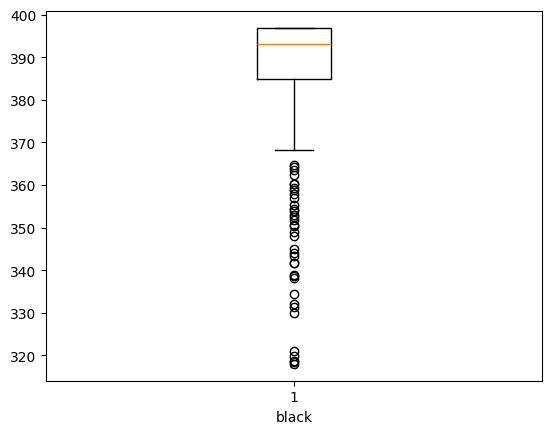

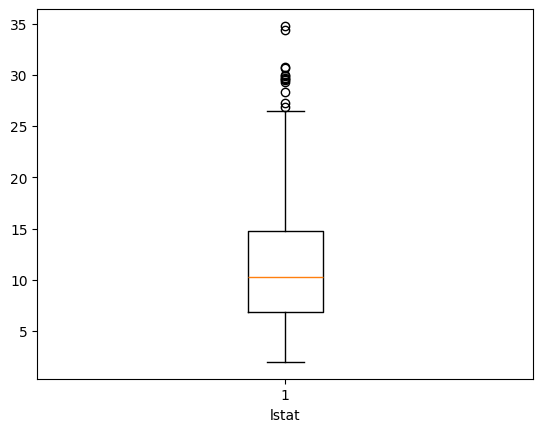

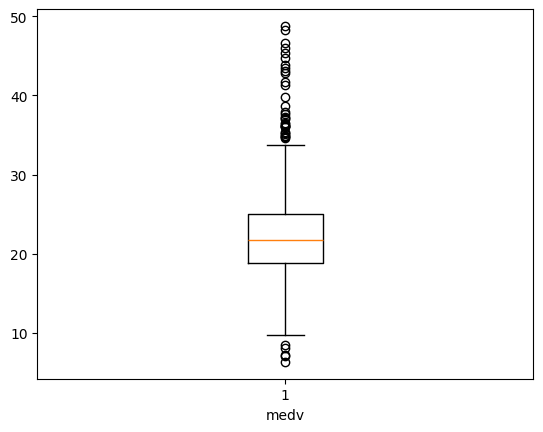

In [17]:
for col in out_list:
  if data_cleaned[col].dtype != 'object':
    plt.boxplot(data_cleaned[col])
    plt.xlabel(col)
    plt.show()

In [18]:
  data.shape

(506, 14)

In [19]:
data_cleaned.shape

(397, 14)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [21]:
x = data.drop(columns = 'medv')
y = data['medv']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 45)

In [23]:
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
lin_reg.coef_

array([-1.11388330e-01,  4.47558733e-02, -4.51706138e-02,  1.95426599e+00,
       -1.64932688e+01,  3.64081143e+00,  7.21200964e-03, -1.52290131e+00,
        3.36404260e-01, -1.45088176e-02, -9.32683598e-01,  8.97543948e-03,
       -5.02725554e-01])

In [26]:
lin_reg.intercept_

np.float64(37.321542125416144)

In [27]:
y_pred= lin_reg.predict(x_test)

In [28]:
pd.DataFrame({'Actual':y_test,
          'predict': y_pred})

,Actual,predict
48,14.4,10.003765
64,33.0,23.435239
473,29.8,24.974275
485,21.2,21.495134
228,46.7,35.087565
...,...,...
129,14.3,13.708572
345,17.5,16.406697
45,19.3,22.127931
369,50.0,31.447149


In [29]:
r2_score(y_test,y_pred)

0.7467438556481081

In [30]:
rmse= root_mean_squared_error(y_test,y_pred)
rmse

4.9458148480244555